Compare Different K Values
1. Run cross-validation with K = 3, 5, 10
2. Plot the accuracy scores for each K.
3. Comment on performance and runtime.

In [2]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# 1. Load data & build a single Decision-Tree instance

In [7]:
X, y = load_iris(return_X_y=True)
dt = DecisionTreeClassifier(random_state=42)

# 2. Cross-validate for K = 3, 5, 10

In [9]:
folds = [3, 5, 10]
results = []

for k in folds:
    tic = time.perf_counter()
    scores = cross_val_score(dt, X, y, cv=k, scoring="accuracy", n_jobs=-1)
    toc = time.perf_counter()

    results.append(
        {
            "K_folds": k,
            "mean_acc": np.mean(scores),
            "std_acc": np.std(scores),
            "runtime_sec": toc - tic,
        }
    )

df = pd.DataFrame(results)
print(df.to_string(index=False))

 K_folds  mean_acc  std_acc  runtime_sec
       3  0.960000 0.016330       0.0094
       5  0.953333 0.033993       0.0109
      10  0.953333 0.042687       0.0197


# 3. Plot accuracy versus K

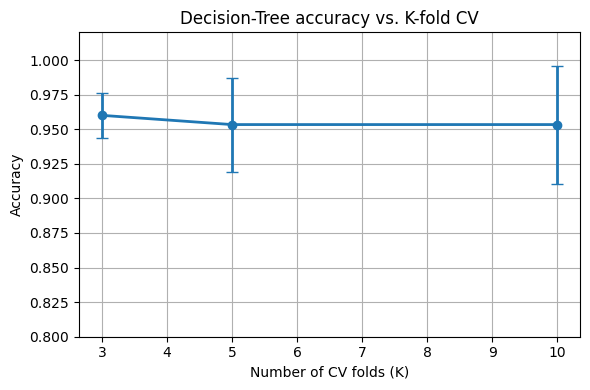

In [28]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.errorbar(
    df["K_folds"],
    df["mean_acc"],
    yerr=df["std_acc"],
    fmt="o-",
    capsize=4,
    lw=2,
)
ax.set(
    xlabel="Number of CV folds (K)",
    ylabel="Accuracy",
    title="Decision-Tree accuracy vs. K-fold CV",
    ylim=(0.8, 1.02),
)
ax.grid(alpha=1)
plt.tight_layout()
plt.show()